In [105]:
import pymc3 as pm
import arviz as az

In [74]:
import scipy.stats as sps
import matplotlib.pyplot as plt

In [64]:
bernoulli = sps.bernoulli(p=0.5)

In [53]:
binom = sps.binom(n=2, p=0.5)

In [37]:
sps.binom(n=9, p=0.1).pmf(0)

0.387420489

In [41]:
sum(sps.binom(n=9, p=0.1).rvs(size=10000)==0)/10000

0.383

In [31]:
binom.pmf([1,2])

array([0.15625, 0.3125 ])

In [54]:
binom.pmf([0,1,2])

array([0.25, 0.5 , 0.25])

In [65]:
bernoulli.pmf([0,1])

array([0.5, 0.5])

In [57]:
bernoulli.rvs(size=10000).sum()/10000

0.5031

In [69]:
# lets generate some coin flips data
# from a binomial distribution
# with a probability of getting a heads p_heads=0.5

In [132]:
sample_size = 10000
p_heads = 0.3
binom = sps.binom(n=1, p=p_heads)
data = binom.rvs(size=sample_size)

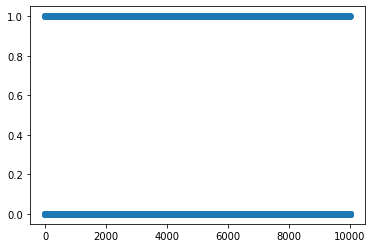

In [133]:
plt.figure()
plt.scatter(range(sample_size), data)
plt.show()
plt.close()

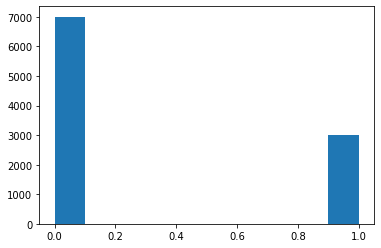

In [134]:
plt.figure()
plt.hist(data);
plt.show()
plt.close()

In [135]:
# lets assume that we don't know the true value of p_heads.
# lets perform Bayesian inference to estimate the parameter p_heads

In [136]:
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1) # prior for p_heads
    y = pm.Binomial('y', n=1, p=theta, observed=data) # likelihood

In [137]:
model

In [138]:
with model:
    start = pm.find_MAP()

In [139]:
start

{'theta_logodds__': array(-0.85063342), 'theta': array(0.2993)}

In [140]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, start=start)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 10 seconds.
The number of effective samples is smaller than 25% for some parameters.


/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/traceplot.py:152: UserWarning: A valid var_name should be provided, found {'t'} expected from {'theta'}
  invalid_var_names, all_var_names


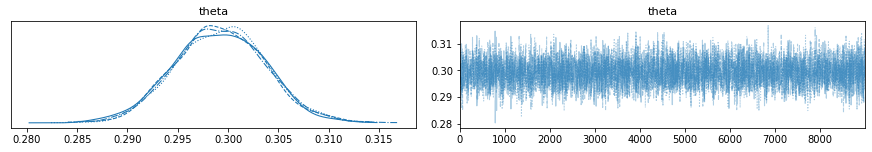

In [141]:
with model:
    burnin=1000
    pm.traceplot(trace[burnin:], lines={'theta':p_heads})

In [142]:
pm.summary(trace)

/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
theta  0.299  0.004   0.291    0.307        0.0      0.0    5296.0  5296.0   

       ess_bulk  ess_tail  r_hat  
theta    5295.0    5310.0    1.0

/Users/spx8sk/anaconda3/envs/bayesian-hackers/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


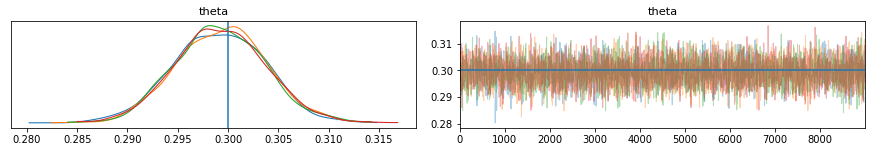

In [143]:
burnin=1000
axes = az.plot_trace(trace[burnin:])
axes[0][0].axvline(p_heads)
axes[0][1].axhline(p_heads)